# Notebook Base de Regressão Logística

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

## Classe de regressão logística
*Faz o trabalho pesado em regressão logística.*

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)
    
    def plot(self, X, y, legend):
        # only plots if X refers to exactly 2 variables
        if X.shape[1] != 2:
            raise ValueError("Can plot only for X's that refers to exactly 2 vars.")
        
        slope = -(self.weights[0]/self.weights[1])
        intercept = -(self.bias/self.weights[1])
        predictions = self.predict(X)

        sns.set_style('white')
        sns.scatterplot(x = X[:,0], y= X[:,1], hue=y.reshape(-1), style=predictions.reshape(-1));

        ax = plt.gca()
        ax.autoscale(False)
        x_vals = np.array(ax.get_xlim())
        y_vals = intercept + (slope * x_vals)
        plt.plot(x_vals, y_vals, c="k");
        
        plt.xlabel(legend[0])
        plt.ylabel(legend[1])

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Importando a base
*Importa a base, seleciona as variáveis, limpa, normaliza.*


In [3]:
df = pd.read_csv("db_estrelas.csv")

df.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
215,32460,173800.0000,6.237,-4.36,3,Blue,O
95,11250,672.0000,6.980,-2.30,3,Blue-white,A
7,2600,0.0004,0.096,17.40,0,Red,M
232,32489,648430.0000,1948.500,-10.84,5,Blue,O
46,3575,123000.0000,45.000,-6.78,4,Red,M


In [4]:
# Específico pro exemplo de estrelas: transforma as várias categorias em só duas
df = df[(df['Spectral Class'] == 'M') | (df['Spectral Class'] == 'B')]
df['Spectral Class'].replace(to_replace='M', value=1, inplace=True)
df['Spectral Class'].replace(to_replace='B', value=0, inplace=True)

# ======================================================== #
# =================== Seleção de Dados =================== #
# ======================================================== #
dados = {
    'X' : ['Temperature (K)', 'Radius(R/Ro)'],
    'y' : 'Spectral Class',
    'normalizada' : False
}
# ======================================================== #


df = df[ dados['X']+[dados['y']] ]
df = df.dropna()

if not dados['normalizada']:
    for col in dados['X']:
        df[[col]] = df[[col]]/df[[col]].mean()

X = df[ dados['X'] ].to_numpy()
y = df[[ dados['y'] ]].to_numpy()
y = np.hstack((y)).T

df.sample(5)

,Temperature (K),Radius(R/Ro),Spectral Class
195,0.447615,0.002650,1
200,2.088788,0.000048,0
67,0.350454,0.000360,1
4,0.241225,0.000407,1
32,1.900437,0.028477,0


## Aplicando a regressão logística
*Aplica a função e avalia a precisão da previsão.*

In [5]:
regressor = LogisticRegression(learning_rate=0.1, n_iters=2000)
regressor.fit(X, y)
predictions = regressor.predict(X)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print(f"A precisão do modelo é: {accuracy(y, predictions)}")

A precisão do modelo é: 1.0


# Plotando os resultados visualmente
*~ se você estiver analisando exatamente 2 vars numéricas ~*

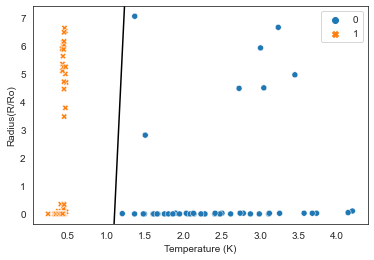

In [6]:
try:
    regressor.plot(X, y, dados['X'])
except:
    print("Sem visualização disponível.")

## Mostrando os pesos
*Cria uma tabela mostrando os pesos de avaliação das variáveis numéricas.*

In [7]:
norma_pesos = pd.DataFrame(regressor.weights)/pd.DataFrame(regressor.weights).abs().sum()
norma_pesos = norma_pesos[0].values.tolist()

dfpesos = pd.DataFrame({'Pesos':norma_pesos}, index=dados['X'])

dfpesos

,Pesos
Temperature (K),-0.98281
Radius(R/Ro),0.01719
